# Parece que a minha implementação está errada

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats 
from tqdm import tqdm

In [5]:
def rejectionSampling(q, p, pSampler, c):
    accepted = False
    while not accepted:
        x = pSampler()
        u = np.random.uniform(0, c*p(x))
        if u < q(x):
            accepted = True
    y = x
    return y

In [6]:
def binomialPMF(k, n, p):
    return stats.binom.pmf(k, n, p)

def uniformDiscretePMF(k, a, b):
    if k >= a and k <= b:
        return 1/(b-a+1)
    else:
        return 0
    
def uniformDiscreteSampler(a, b):
    N = b - a + 1
    return int(np.random.uniform(0, 1) * N)

In [55]:
n = 10
p = 0.2
sample = pd.Series([rejectionSampling(
    lambda k: binomialPMF(k, n, p), 
    lambda k: uniformDiscretePMF(k, 0, n), 
    lambda: uniformDiscreteSampler(0, n),
    c = 32
) for i in tqdm(range(10000))])

100%|██████████| 10000/10000 [00:28<00:00, 353.18it/s]


In [61]:
sampleForPlot = sample.value_counts().sort_index().reset_index()
sampleForPlot.columns = ['k', 'q_Y(k)']
sampleForPlot['q_Y(k)'] = sampleForPlot['q_Y(k)'] / sampleForPlot['q_Y(k)'].sum()
sampleForPlot.head()

,k,q_Y(k)
0,0,0.1050
1,1,0.2731
2,2,0.3027
3,3,0.2001
4,4,0.0892


<AxesSubplot:xlabel='k', ylabel='q_Y(k)'>

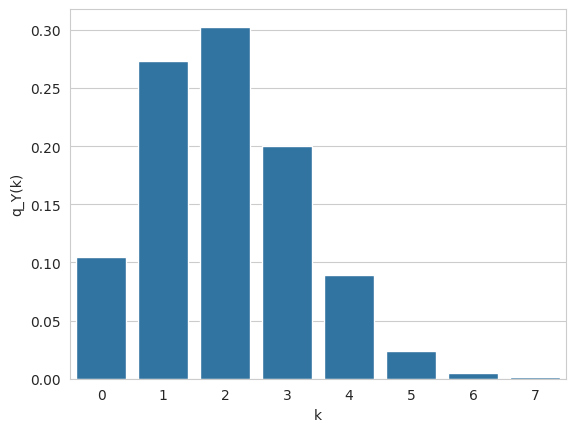

In [62]:
sns.barplot(data = sampleForPlot, x = 'k', y = 'q_Y(k)', color = '#1f77b4')